# 📜 **Finance Laws Retrieval-Augmented Generation (RAG) System**
### **Ironhack Data Science and Machine Learning Bootcamp**
📅 **Date:** February 5, 2025  
📅 **Submission Date:** February 7, 2025  
👩‍💻 **Authors:** Ginosca Alejandro Dávila & Natanael Santiago Morales  

---

## **📌 Project Overview**
This project aims to build a **Retrieval-Augmented Generation (RAG) system** focused on **finance laws and regulations**. By integrating a **vector database** for document retrieval and a **Large Language Model (LLM)** for response generation, the system will provide **accurate, contextualized answers** to legal and financial queries.

We will experiment with different **embedding models** (e.g., OpenAI’s `text-embedding-ada-002` vs. `all-MiniLM-L6-v2`) and **vector databases** (e.g., ChromaDB, FAISS) to optimize information retrieval and response generation.

---

## **📂 Dataset Description**
- **Source:** A collection of **finance laws, regulations, and legal texts**.  
- **Format:** `.zip` file containing multiple `.pdf` files, each representing legal provisions, case law, or financial regulations.  
- **Location:**  
  📁 `My Drive/Colab Notebooks/Week 8/Week 8 - Day 3/project-5-2-genai-rag/data/Finance_Laws.zip`

---

## **🎯 Goals**
✔ Develop a **RAG pipeline** specialized in finance law and legal text retrieval.  
✔ Compare **OpenAI embeddings** and **Sentence Transformers** for legal text retrieval.  
✔ Evaluate the system based on **retrieval accuracy** and **response relevance**.  
✔ (Bonus) Deploy the system as a **web application** using Streamlit or Flask.  
✔ (Bonus) Incorporate **legal case studies** and **financial reports** for richer context.  

---

## **💾 Project Structure**
📁 `My Drive/Colab Notebooks/Week 8/Week 8 - Day 3/project-5-2-genai-rag/` → Main project folder  
📄 `finance_laws_rag_system.ipynb` → Notebook for RAG system development  
📁 `data/` → Contains `Finance_Laws.zip` (legal dataset)  

---

🔹 **Let’s dive in and build our Finance RAG system! 🚀**


## **🔍 Exploratory Data Analysis (EDA)**

In this section, we will explore the **Finance Laws dataset** to understand its structure, identify data cleaning needs, and prepare the text for chunking and embedding.

### **Key EDA Steps:**
- **Inspect folder structure** and file naming conventions.
- **Preview sample legal documents** to assess formatting, length, and structure.
- **Identify missing or corrupted files**.
- Plan **preprocessing** steps for future embedding tasks, such as:
  - Removing redundant sections (e.g., headers, footnotes).
  - Splitting large documents into manageable chunks.
  - Standardizing text encoding.

*We will install additional libraries like `langchain` and `chromadb` later when building the RAG pipeline.*

---

🔄 *Note:* If the **runtime disconnects** and the environment resets, we will **re-run the extraction** and **cleanup steps**. Our code checks will ensure files aren't duplicated or overwritten unnecessarily.


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os  # ✅ Import the os module

# List the files in the dataset directory to verify the correct path
data_path = "/content/drive/My Drive/Colab Notebooks/Week 8/Week 8 - Day 3/project-5-2-genai-rag/data"

# Ensure the directory exists before listing files
if os.path.exists(data_path):
    files = os.listdir(data_path)

    print("📂 Files in the dataset directory:")
    for file in files:
        print(" -", file)
else:
    print("❌ The dataset directory does not exist! Check the path.")


📂 Files in the dataset directory:
 - Finance_laws.zip
 - PuertoRico_en.zip


In [ ]:
import os
import zipfile

# Define dataset path and extraction path (inside 'data/' folder)
dataset_path = '/content/drive/My Drive/Colab Notebooks/Week 8/Week 8 - Day 3/project-5-2-genai-rag/data/Finance_laws.zip'
extract_path = '/content/drive/My Drive/Colab Notebooks/Week 8/Week 8 - Day 3/project-5-2-genai-rag/data/finance_laws'

# Verify if the dataset file exists before extracting
if os.path.exists(dataset_path):
    if not os.path.exists(extract_path) or len(os.listdir(extract_path)) == 0:
        os.makedirs(extract_path, exist_ok=True)  # Ensure the directory exists
        with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
            zip_ref.extractall(extract_path)
        print(f"✅ Dataset extracted successfully to {extract_path}!")
    else:
        print(f"✅ Dataset already extracted at {extract_path}. No re-extraction needed.")
else:
    print("❌ Dataset file not found! Please check the path.")


✅ Dataset already extracted at /content/drive/My Drive/Colab Notebooks/Week 8/Week 8 - Day 3/project-5-2-genai-rag/data/finance_laws. No re-extraction needed.


## **📂 Dataset Structure Exploration**

Let's examine the extracted dataset's folder and file structure to understand how **finance laws and regulations** are organized.


In [ ]:
# List extracted files to confirm successful extraction
extracted_files = os.listdir(extract_path)

print("📂 Extracted files in 'finance_laws/' folder:")
for file in extracted_files[:10]:  # Display first 10 files only
    print(" -", file)


📂 Extracted files in 'finance_laws/' folder:
 - EurLex_v1
 - __MACOSX


In [ ]:
# Define the correct extracted path
correct_extract_path = "/content/drive/My Drive/Colab Notebooks/Week 8/Week 8 - Day 3/project-5-2-genai-rag/data/finance_laws"

# List contents of the extracted dataset to understand the folder structure
print("📂 Root contents of finance_laws:")
!ls "{correct_extract_path}"
print("\n" + "-"*50 + "\n")

# Explore the contents inside EurLex_v1
eurlex_path = f"{correct_extract_path}/EurLex_v1"
if os.path.exists(eurlex_path):
    print("📂 Contents of EurLex_v1:")
    !ls "{eurlex_path}" | head
else:
    print("❌ EurLex_v1 folder not found.")

print("\n" + "-"*50 + "\n")

# Explore the contents inside __MACOSX (if exists)
macosx_path = f"{correct_extract_path}/__MACOSX"
if os.path.exists(macosx_path):
    print("📂 Contents of __MACOSX:")
    !ls "{macosx_path}" | head
else:
    print("✅ No __MACOSX folder found (this is good).")

print("\n" + "-"*50 + "\n")

# Explore the contents inside __MACOSX/EurLex_v1 if it exists
macosx_eurlex_path = f"{macosx_path}/EurLex_v1"
if os.path.exists(macosx_eurlex_path):
    print("📂 Contents of __MACOSX/EurLex_v1 (including hidden files):")
    !ls -la "{macosx_eurlex_path}" | head
else:
    print("✅ No EurLex_v1 folder inside __MACOSX (this is expected).")

📂 Root contents of finance_laws:
embedded_chunks.csv  EurLex_v1	pdf_metadata.csv

--------------------------------------------------

📂 Contents of EurLex_v1:
AMLD_EURLEX_cleaned.txt
AMLD_EURLEX.pdf
AMLD_EURLEX.pdf_preview.txt
AMLD_EURLEX.txt
BRRD_EURLEX_cleaned.txt
BRRD_EURLEX.pdf
BRRD_EURLEX.txt
CRD_EURLEX_cleaned.txt
CRD_EURLEX.pdf
CRD_EURLEX.txt

--------------------------------------------------

✅ No __MACOSX folder found (this is good).

--------------------------------------------------

✅ No EurLex_v1 folder inside __MACOSX (this is expected).


## **🧐 Key Observations from Dataset Structure**
- The dataset contains a **main folder** (`EurLex_v1`) where finance law documents are stored.
- Files in `EurLex_v1` are **PDFs**, suggesting that **text extraction** will be needed before using them in the RAG pipeline.
- A `__MACOSX` folder is present, which is **not needed** and can be safely ignored or removed. This folder is often created when zipping files on macOS and contains hidden metadata.
- The filenames suggest they are **abbreviations of European financial regulations** (e.g., `AMLD_EURLEX.pdf` likely refers to the **Anti-Money Laundering Directive**).

---

### **🔧 Next Steps**
✔ **Remove `__MACOSX` folder** to clean up unnecessary metadata.  
✔ **Extract text from PDFs** for further processing.  
✔ **Analyze sample documents** to understand their structure and readability.

*Our extraction and cleanup steps are designed to be **idempotent**, ensuring no errors if the notebook is re-run after a runtime reset.*


## 🗑️ Removing Unnecessary System Files

The extracted dataset includes a `__MACOSX` folder, which is an unwanted system-generated folder created when zipping files on macOS. This folder contains metadata that is **not relevant** to our project.

To keep our dataset clean and organized, we will **remove the `__MACOSX` folder** before proceeding with further analysis.


In [ ]:
import shutil

# Define the path to the __MACOSX folder
macosx_path = f"{correct_extract_path}/__MACOSX"

# Remove the __MACOSX folder if it exists
if os.path.exists(macosx_path):
    shutil.rmtree(macosx_path)
    print("✅ '__MACOSX' folder removed successfully!")
else:
    print("✅ '__MACOSX' folder was not found, no action needed.")


✅ '__MACOSX' folder removed successfully!


## ✅ Dataset Cleanup Completed

The `__MACOSX` folder has been successfully removed. Now, our dataset only contains relevant legal documents.

🔹 Before extracting text, we will **review the number of pages** and **preview the content** of the PDF files inside the `EurLex_v1` folder. This will help us understand the **structure, length, and readability** of each document.

Once we're familiar with the documents' layout, we'll proceed with **full text extraction** for analysis.


## 📄 Overview of PDF Files

Before diving into text extraction, we'll examine the **number of pages** in each document to understand their length and complexity. This will help identify particularly long or short documents and anticipate any potential processing challenges.

We'll also collect **basic metadata** to get a better sense of the dataset's structure.


In [ ]:
# Install PyMuPDF to handle PDF extraction, skip if already installed
try:
    import fitz
    print("✅ PyMuPDF is already installed.")
except ImportError:
    !pip install PyMuPDF
    import fitz
    print("✅ PyMuPDF installed successfully!")


✅ PyMuPDF is already installed.


In [ ]:
import fitz  # PyMuPDF
import pandas as pd
from datetime import datetime

def format_pdf_date(pdf_date):
    """
    Converts PDF date format 'D:YYYYMMDDHHMMSS+TZ' to a human-readable format.
    Example: 'D:20130625085637+02'00'' -> 'June 25, 2013'
    """
    if not pdf_date or not pdf_date.startswith('D:'):
        return "Unknown Date"
    try:
        # Extract date part and ignore timezone info
        date_str = pdf_date[2:16]
        date_obj = datetime.strptime(date_str, '%Y%m%d%H%M%S')
        return date_obj.strftime('%B %d, %Y')
    except:
        return "Unknown Date"

def get_pdf_metadata(pdf_folder):
    """Retrieve the number of pages and basic metadata from all PDF files in a folder."""
    pdf_metadata = {}

    # List all PDF files in the directory
    pdf_files = [file for file in os.listdir(pdf_folder) if file.endswith('.pdf')]

    print(f"🔍 Found {len(pdf_files)} PDF files in '{pdf_folder}':\n")

    for pdf_file in pdf_files:
        file_path = os.path.join(pdf_folder, pdf_file)
        try:
            with fitz.open(file_path) as pdf:
                total_pages = len(pdf)
                metadata = pdf.metadata
                pdf_metadata[pdf_file] = {
                    "pages": total_pages,
                    "title": metadata.get("title") or "Untitled Document",
                    "author": metadata.get("author") or "Unknown Author",
                    "creation_date": format_pdf_date(metadata.get("creationDate"))
                }
        except Exception as e:
            print(f"❌ Error reading {pdf_file}: {e}")

    return pdf_metadata

# Path to EurLex_v1 folder
eurlex_path = f"{correct_extract_path}/EurLex_v1"

# Get PDF metadata
pdf_metadata = get_pdf_metadata(eurlex_path)

# Display the metadata
for file, details in pdf_metadata.items():
    print(f"📄 {file}")
    print(f"   - Pages: {details['pages']}")
    print(f"   - Title: {details['title']}")
    print(f"   - Author: {details['author']}")
    print(f"   - Creation Date: {details['creation_date']}")
    print("-" * 50)

# Save metadata to CSV for future use
metadata_df = pd.DataFrame.from_dict(pdf_metadata, orient='index')
csv_path = f"{correct_extract_path}/pdf_metadata.csv"
metadata_df.to_csv(csv_path)
print(f"✅ PDF metadata saved to '{csv_path}' for future use!")


🔍 Found 11 PDF files in '/content/drive/My Drive/Colab Notebooks/Week 8/Week 8 - Day 3/project-5-2-genai-rag/data/finance_laws/EurLex_v1':

📄 DGSD_EURLEX.pdf
   - Pages: 30
   - Title: Directive 2014/49/EU of the European Parliament and of the Council of 16 April 2014 on deposit guarantee schemesText with EEA relevance
   - Author: Publications Office
   - Creation Date: June 11, 2014
--------------------------------------------------
📄 BRRD_EURLEX.pdf
   - Pages: 159
   - Title: DUMMY
   - Author: Publications Office
   - Creation Date: June 11, 2014
--------------------------------------------------
📄 PSD_EURLEX.pdf
   - Pages: 93
   - Title: Directive (EU) 2015/ of the European Parliament and of the Council of 25 November 2015 on payment services in the internal market, amending Directives 2002/65/EC, 2009/110/EC and 2013/36/EU and Regulation (EU) No 1093/2010, and repealing Directive 2007/64/EC
   - Author: Publications Office
   - Creation Date: December 22, 2015
-----------------

## **🔍 Key Observations from PDF Metadata**

- The dataset contains **11 PDF files** covering various **European financial regulations**.
- Documents vary significantly in length:
  - The **shortest document** is *WTR_EURLEX.pdf* with **18 pages**.
  - The **longest document** is *CRR_EURLEX.pdf* with **337 pages**.
- Some files have **detailed titles** (e.g., *AMLD_EURLEX.pdf*), while others show generic or missing titles (e.g., *BRRD_EURLEX.pdf* marked as "DUMMY").
- All documents were published by the **Publications Office** and have creation dates ranging from **2013 to 2019**.

---

### **Next Steps**

We will now **preview the content** of selected PDF files to evaluate:
- **Text structure** (e.g., paragraphs, bullet points, tables).
- Presence of **headers, footers, or legal references**.
- **Readability** and potential challenges for text extraction.

*In the next step, we’ll focus on **previewing** the first, middle, and last pages of sample PDFs to get a comprehensive view of their structure.*


## **📄 Previewing PDF Content**

To better understand the **structure and formatting** of the documents, we will preview the **first few pages**, **middle pages**, and **last pages** of selected PDFs. This approach ensures we capture variations in formatting and structure across the entire document.

### **What We'll Look For:**
- **Text clarity and formatting** (e.g., paragraphs, bullet points, legal citations).
- Presence of **non-textual elements** (e.g., tables, headers, footnotes).
- Potential **challenges in text extraction** (e.g., scanned text, complex layouts).

We'll start by previewing the **first 3 pages**, **3 middle pages**, and **last 3 pages** of a few representative documents.  
Additionally, the **previews will be saved** to your Google Drive for easy reference.


In [ ]:
import fitz  # PyMuPDF

def preview_pdf(file_path, max_pages=3, char_limit=1000, save_preview=False):
    """Display and optionally save a preview of the first, middle, and last pages of a PDF."""

    preview_content = []
    try:
        with fitz.open(file_path) as pdf:
            total_pages = len(pdf)
            doc_name = os.path.basename(file_path)
            print(f"\n📄 **Document:** {doc_name}")
            print(f"📜 **Total Pages:** {total_pages}")
            print("="*60)

            # Define which pages to preview
            first_pages = list(range(1, min(max_pages + 1, total_pages + 1)))
            middle_start = total_pages // 2 - max_pages // 2
            middle_pages = list(range(max(1, middle_start), min(middle_start + max_pages, total_pages + 1)))
            last_pages = list(range(max(1, total_pages - max_pages + 1), total_pages + 1))

            # Helper function to extract page text
            def extract_pages(pages, section):
                section_content = f"\n🔹 **{section} Pages Preview:**\n"
                for page_num in pages:
                    page = pdf.load_page(page_num - 1)
                    text = page.get_text()
                    section_content += f"\n--- Page {page_num} ---\n{text[:char_limit] if text else '(No text found)'}"
                    if len(text) > char_limit:
                        section_content += "\n... (truncated) ...\n"
                    section_content += "-" * 60 + "\n"
                return section_content

            # Extract and display each section
            preview_content.append(extract_pages(first_pages, "First"))
            preview_content.append(extract_pages(middle_pages, "Middle"))
            preview_content.append(extract_pages(last_pages, "Last"))

            # Display preview
            for section in preview_content:
                print(section)

            # Optionally save preview to Google Drive
            if save_preview:
                preview_path = f"{eurlex_path}/{doc_name}_preview.txt"
                with open(preview_path, 'w') as f:
                    f.write("\n".join(preview_content))
                print(f"💾 Preview saved to: {preview_path}")

    except Exception as e:
        print(f"❌ Error reading {file_path}: {e}")

# Sample PDF files to inspect
sample_files = [
    f"{eurlex_path}/AMLD_EURLEX.pdf",  # Anti-Money Laundering Directive
    f"{eurlex_path}/CRR_EURLEX.pdf",   # Capital Requirements Regulation (longest)
    f"{eurlex_path}/WTR_EURLEX.pdf"    # Shortest document
]

# Run the function with save_preview=True to save the previews
for file in sample_files:
    preview_pdf(file, save_preview=True)



📄 **Document:** AMLD_EURLEX.pdf
📜 **Total Pages:** 45

🔹 **First Pages Preview:**

--- Page 1 ---
DIRECTIVES 
DIRECTIVE (EU) 2015/849 OF THE EUROPEAN PARLIAMENT AND OF THE COUNCIL 
of 20 May 2015 
on the prevention of the use of the financial system for the purposes of money laundering or 
terrorist financing, amending Regulation (EU) No 648/2012 of the European Parliament and of the 
Council, and repealing Directive 2005/60/EC of the European Parliament and of the Council and 
Commission Directive 2006/70/EC 
(Text with EEA relevance) 
THE EUROPEAN PARLIAMENT AND THE COUNCIL OF THE EUROPEAN UNION, 
Having regard to the Treaty on the Functioning of the European Union, and in particular Article 114 thereof, 
Having regard to the proposal from the European Commission, 
After transmission of the draft legislative act to the national parliaments, 
Having regard to the opinion of the European Central Bank (1), 
Having regard to the opinion of the European Economic and Social Committee (2),

## **🔍 Key Insights from PDF Previews**

After reviewing the **first**, **middle**, and **last pages** of the selected documents, here are some key observations:

### **1. Document Structure & Formatting**
- The documents follow a **consistent legal structure**, starting with the **title and preamble**, followed by **articles** and **annexes**.
- **Middle sections** often contain detailed legislative clauses, **technical terms**, and sometimes **tables** or **lists**.
- **Last pages** typically include **annexes**, **correlation tables**, and **references** to other directives or regulations.

### **2. Text Extraction Challenges**
- **Text formatting** is clear in most documents, but certain sections may include **tables** or **legal cross-references** that require special handling during extraction.
- Some documents have **long lists** of legal articles in annexes, which may need **post-processing** to separate from the main content.

### **3. Saved Previews**
- **Previews of all inspected documents** have been saved to Google Drive for quick access and future reference.

### **4. Next Steps**
- Proceed with **full-text extraction** from all PDF documents.
- Apply **cleaning and preprocessing** techniques to handle potential formatting inconsistencies.


## **📜 Full Text Extraction from PDF Documents**

Now that we have a good understanding of the documents' structure, we'll proceed to **extract the full text** from all the PDFs in the `EurLex_v1` folder.

### **Objectives:**
- Extract **raw text** from each document for further analysis.
- Store the extracted text in a structured format (e.g., a **dictionary** or **DataFrame**) for easy access.
- **Save extracted text** as `.txt` files to Google Drive for backup and future reference.
- Generate a **summary CSV file** to provide a quick overview of extracted word counts for each document.
- Identify any **extraction issues** (e.g., missing content, unreadable sections).

Once the text is extracted, we'll **preprocess** it to remove unnecessary characters and prepare it for analysis.


In [ ]:
import fitz  # PyMuPDF
import pandas as pd

def extract_text_from_pdfs(pdf_folder, save_to_drive=True):
    """Extract text from all PDFs in the folder, save each as .txt, and summarize word counts in a CSV."""
    extracted_texts = {}
    summary_data = []

    pdf_files = [file for file in os.listdir(pdf_folder) if file.endswith('.pdf')]
    print(f"🔍 Extracting text from {len(pdf_files)} PDF files in '{pdf_folder}':\n")

    for pdf_file in pdf_files:
        file_path = os.path.join(pdf_folder, pdf_file)
        try:
            with fitz.open(file_path) as pdf:
                full_text = ""
                for page in pdf:
                    full_text += page.get_text()

                word_count = len(full_text.split())
                extracted_texts[pdf_file] = full_text.strip()
                summary_data.append({"Document": pdf_file, "Word Count": word_count})

                print(f"✅ Extracted text from '{pdf_file}' ({word_count} words).")

                # Save each extracted text as .txt
                if save_to_drive:
                    save_path = os.path.join(pdf_folder, pdf_file.replace('.pdf', '.txt'))
                    with open(save_path, 'w') as text_file:
                        text_file.write(full_text)
                    print(f"💾 Saved extracted text to: {save_path}")

        except Exception as e:
            print(f"❌ Error extracting text from '{pdf_file}': {e}")

    # Save summary CSV file
    if save_to_drive:
        summary_df = pd.DataFrame(summary_data)
        summary_csv_path = os.path.join(pdf_folder, "pdf_text_summary.csv")
        summary_df.to_csv(summary_csv_path, index=False)
        print(f"\n✅ Summary of extracted texts saved to '{summary_csv_path}'.")

    return extracted_texts

# Extract text and save to Google Drive
pdf_text_data = extract_text_from_pdfs(eurlex_path)


🔍 Extracting text from 11 PDF files in '/content/drive/My Drive/Colab Notebooks/Week 8/Week 8 - Day 3/project-5-2-genai-rag/data/finance_laws/EurLex_v1':

✅ Extracted text from 'DGSD_EURLEX.pdf' (14926 words).
💾 Saved extracted text to: /content/drive/My Drive/Colab Notebooks/Week 8/Week 8 - Day 3/project-5-2-genai-rag/data/finance_laws/EurLex_v1/DGSD_EURLEX.txt
✅ Extracted text from 'BRRD_EURLEX.pdf' (87413 words).
💾 Saved extracted text to: /content/drive/My Drive/Colab Notebooks/Week 8/Week 8 - Day 3/project-5-2-genai-rag/data/finance_laws/EurLex_v1/BRRD_EURLEX.txt
✅ Extracted text from 'PSD_EURLEX.pdf' (49374 words).
💾 Saved extracted text to: /content/drive/My Drive/Colab Notebooks/Week 8/Week 8 - Day 3/project-5-2-genai-rag/data/finance_laws/EurLex_v1/PSD_EURLEX.txt
✅ Extracted text from 'IFD_EURLEX.pdf' (30244 words).
💾 Saved extracted text to: /content/drive/My Drive/Colab Notebooks/Week 8/Week 8 - Day 3/project-5-2-genai-rag/data/finance_laws/EurLex_v1/IFD_EURLEX.txt
✅ Extract

## **📊 Summary of Extracted Texts**

Now that we've extracted text from all PDFs, let's review a summary of the results. This includes the **file names** and the **word count** for each document, providing insight into the size of each text.

This summary helps us:
- **Verify** that all files were processed correctly.
- Identify any **unexpected anomalies** in word counts.
- Prepare for the next step of **text preprocessing**.


📊 **Sorted Word Count Summary:**


,Document,Word Count
0,CRR_EURLEX.pdf,220312
1,BRRD_EURLEX.pdf,87413
2,CRD_EURLEX.pdf,65530
3,PSD_EURLEX.pdf,49374
4,IFR_EURLEX.pdf,38262
5,MCD_EURLEX.pdf,37424
6,IFD_EURLEX.pdf,30244
7,SecReg_EURLEX.pdf,30216
8,AMLD_EURLEX.pdf,25653
9,DGSD_EURLEX.pdf,14926



✅ **No anomalies detected in word counts.**


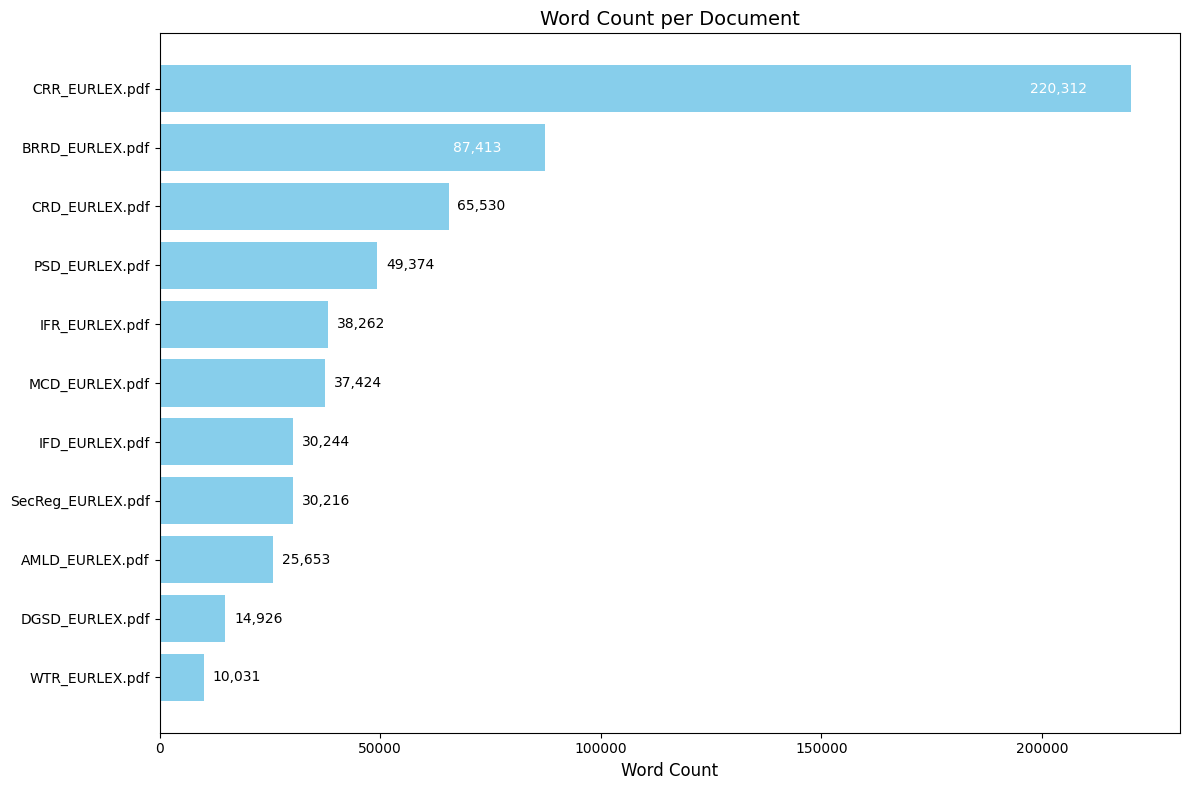

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the summary CSV
summary_path = f"{eurlex_path}/pdf_text_summary.csv"
pdf_summary_df = pd.read_csv(summary_path)

# Sort by Word Count in descending order for better readability
pdf_summary_df = pdf_summary_df.sort_values(by='Word Count', ascending=False).reset_index(drop=True)

# Display the sorted summary DataFrame
print("📊 **Sorted Word Count Summary:**")
display(pdf_summary_df)

# Anomaly Detection: Flag documents with less than 5,000 words
anomalies = pdf_summary_df[pdf_summary_df['Word Count'] < 5000]
if not anomalies.empty:
    print("\n⚠️ **Potential Anomalies Detected:**")
    display(anomalies)
else:
    print("\n✅ **No anomalies detected in word counts.**")

# Bar Plot with anomaly highlighting and label positioning
plt.figure(figsize=(12, 8))
colors = ['tomato' if count < 5000 else 'skyblue' for count in pdf_summary_df['Word Count']]
bars = plt.barh(pdf_summary_df['Document'], pdf_summary_df['Word Count'], color=colors)
plt.xlabel('Word Count', fontsize=12)
plt.title('Word Count per Document', fontsize=14)
plt.gca().invert_yaxis()

# Add value labels to bars
for bar in bars:
    width = bar.get_width()
    label_position = width - 10000 if width > 80000 else width + 2000
    alignment = 'right' if width > 80000 else 'left'

    plt.text(label_position, bar.get_y() + bar.get_height() / 2,
             f'{width:,}',
             va='center', ha=alignment, fontsize=10, color='white' if width > 80000 else 'black')

plt.tight_layout()
plt.show()


## **📝 Observations from Word Count Summary**

The word count summary provides an overview of the **size and scope** of each document:

- The **CRR_EURLEX.pdf** is the largest document with over **220,000 words**, while **WTR_EURLEX.pdf** is the smallest with around **10,000 words**.
- No anomalies were detected, indicating that all PDFs were extracted successfully without any missing or incomplete content.
- This variation in document length may influence the **complexity of preprocessing** and the **computational resources** required in the next steps.

### **Next Steps:**
- Proceed with **text preprocessing** to clean and standardize the extracted content.


## **📥 Loading Extracted Text Files**

Now that we've successfully extracted text from the PDFs and saved them to Google Drive, we will load these **extracted text files** for further processing. This step ensures:

- **Data Persistence**: Avoiding re-extraction in case of a runtime disconnection.
- **Preparation for Preprocessing**: The loaded texts will serve as the basis for cleaning and embedding.

We will load each `.txt` file and verify that the data has been successfully retrieved.


In [ ]:
import os

# Path to the folder containing the extracted text files
extracted_text_path = f"{eurlex_path}"

# List all extracted text files
extracted_files = [file for file in os.listdir(extracted_text_path) if file.endswith('.txt')]

# Load and preview content from the extracted files
extracted_texts = {}

for file in extracted_files:
    with open(os.path.join(extracted_text_path, file), 'r', encoding='utf-8') as f:
        extracted_texts[file] = f.read()

# Display the loaded files and their lengths
for file, text in extracted_texts.items():
    print(f"📄 **{file}** - {len(text.split())} words")


📄 **AMLD_EURLEX.pdf_preview.txt** - 1424 words
📄 **CRR_EURLEX.pdf_preview.txt** - 1325 words
📄 **WTR_EURLEX.pdf_preview.txt** - 1440 words
📄 **DGSD_EURLEX.txt** - 14926 words
📄 **BRRD_EURLEX.txt** - 87413 words
📄 **PSD_EURLEX.txt** - 49374 words
📄 **IFD_EURLEX.txt** - 30244 words
📄 **IFR_EURLEX.txt** - 38262 words
📄 **AMLD_EURLEX.txt** - 25653 words
📄 **SecReg_EURLEX.txt** - 30216 words
📄 **MCD_EURLEX.txt** - 37424 words
📄 **WTR_EURLEX.txt** - 10031 words
📄 **CRR_EURLEX.txt** - 220312 words
📄 **CRD_EURLEX.txt** - 65530 words
📄 **DGSD_EURLEX_cleaned.txt** - 14623 words
📄 **PSD_EURLEX_cleaned.txt** - 48439 words
📄 **IFD_EURLEX_cleaned.txt** - 29850 words
📄 **IFR_EURLEX_cleaned.txt** - 37645 words
📄 **MCD_EURLEX_cleaned.txt** - 36955 words
📄 **WTR_EURLEX_cleaned.txt** - 9898 words
📄 **BRRD_EURLEX_cleaned.txt** - 86107 words
📄 **AMLD_EURLEX_cleaned.txt** - 25303 words
📄 **CRR_EURLEX_cleaned.txt** - 215960 words
📄 **SecReg_EURLEX_cleaned.txt** - 29739 words
📄 **CRD_EURLEX_cleaned.txt** - 64

## **🔎 Previewing Extracted Text Files**

To ensure the quality and completeness of the text extraction process, we will preview three sections of selected documents:

1. **First Section**: Beginning of the document.
2. **Middle Section**: Central part of the document.
3. **Last Section**: Ending of the document.

We will focus on three representative documents:
- **CRR_EURLEX.txt**: The largest document in the dataset.
- **BRRD_EURLEX.txt**: A medium-sized document.
- **WTR_EURLEX.txt**: The smallest document.

This preview helps us confirm:
- **Extraction Quality**: Ensuring no missing or garbled text.
- **Document Structure**: Understanding the flow of content for later chunking and embedding.


In [ ]:
# Function to preview first, middle, and last parts of the document
def preview_extracted_text(file_name, text, preview_length=1000):
    total_length = len(text)
    middle_index = total_length // 2

    print(f"📄 **Document:** {file_name}")
    print("="*80)

    # Preview First Part
    print("\n🔹 **First Preview:**")
    print(text[:preview_length], "\n" + "-"*80)

    # Preview Middle Part
    print("\n🔹 **Middle Preview:**")
    print(text[middle_index:middle_index + preview_length], "\n" + "-"*80)

    # Preview Last Part
    print("\n🔹 **Last Preview:**")
    print(text[-preview_length:], "\n" + "="*80)

# Choose three PDFs for detailed preview
selected_files = ['CRR_EURLEX.txt', 'BRRD_EURLEX.txt', 'WTR_EURLEX.txt']

for file in selected_files:
    preview_extracted_text(file, extracted_texts[file])


📄 **Document:** CRR_EURLEX.txt

🔹 **First Preview:**
I 
(Legislative acts) 
REGULATIONS 
REGULATION (EU) No 575/2013 OF THE EUROPEAN PARLIAMENT AND OF THE COUNCIL 
of 26 June 2013 
on prudential requirements for credit institutions and investment firms and amending Regulation 
(EU) No 648/2012 
(Text with EEA relevance) 
THE EUROPEAN PARLIAMENT AND THE COUNCIL OF THE 
EUROPEAN UNION, 
Having regard to the Treaty on the Functioning of the European 
Union, and in particular Article 114 thereof, 
Having regard to the proposal from the European Commission, 
After transmission of the draft legislative act to the national 
parliaments, 
Having regard to the opinion of the European Central Bank ( 1 ), 
Having regard to the opinion of the European Economic and 
Social Committee ( 2 ), 
Acting in accordance with the ordinary legislative procedure, 
Whereas: 
(1) 
The G-20 Declaration of 2 April 2009 on Strengthening 
of the Financial System called for internationally 
consistent efforts that ar

## **🔍 Verifying Extraction Quality**

The previews confirm the **accuracy and completeness** of our text extraction process. Key observations include:

- **Consistent Structure**: The documents retain their original headers, article structures, and references.
- **Clean Extraction**: No major signs of **garbled text** or missing sections across the previews.
- **Ready for Preprocessing**: The content appears well-structured, facilitating easier chunking and embedding in the next steps.

### **Next Steps:**
1. **Text Preprocessing**: Clean and standardize the extracted text (removing headers, footers, special characters, etc.).
2. **Chunking and Embedding**: Split the text into manageable chunks and convert them into embeddings for the Vector Database.


## **🧹 Text Preprocessing: Cleaning Legal Documents**

To prepare the extracted text for embedding, we will apply several **preprocessing steps** that clean and standardize the content. These steps ensure that our data is consistent and optimized for retrieval and generation tasks.

### **Preprocessing Steps:**

1. **Remove Non-Informative Text**:
   - Delete headers, footers, page numbers, and section markers (e.g., "Page 1", "Section IV").
   
2. **Standardize Legal References**:
   - Instead of removing legal references (e.g., "Article 5", "Directive 2005/60/EC"), we'll **normalize** them for consistency. This helps retain valuable legal context.

3. **Selective Lowercasing**:
   - Convert text to **lowercase**, but **preserve capitalization** for:
     - **Proper nouns** (e.g., *European Union*, *OpenAI*).
     - **Acronyms** (e.g., *EU*, *LLM*).
     - **Standardized legal references** (e.g., *Directive 2005/60/EC*).

4. **Remove Special Characters**:
   - Eliminate unnecessary symbols, excessive punctuation, and formatting artifacts.

5. **Whitespace Normalization**:
   - Clean up extra spaces, tabs, and line breaks to streamline the text.

---

### **Next Steps:**

We'll begin with **basic text cleaning** and iteratively refine our approach based on the specific structure of the legal documents.


In [ ]:
import re

def clean_legal_text(text):
    # Step 1: Remove headers, footers, and page markers
    text = re.sub(r'Page\s*\d+|Official Journal of the European Union|EN\s*\d*', '', text)

    # Step 2: Standardize legal references (e.g., "Article 5", "Directive 2005/60/EC")
    text = re.sub(r'(Article\s*\d+)', r'\1', text)  # Keep Article references
    text = re.sub(r'(Directive\s*\d{4}/\d+/EC)', r'\1', text)  # Keep Directive references

    # Step 3: Selective Lowercasing
    # Lowercase everything except acronyms (like EU, LLM) and legal references
    def selective_lowercase(match):
        word = match.group(0)
        if word.isupper() and len(word) > 1:  # Preserve acronyms
            return word
        elif re.match(r'(Directive\s*\d{4}/\d+/EC|Article\s*\d+)', word):  # Preserve legal references
            return word
        else:
            return word.lower()

    text = re.sub(r'\b\w+\b', selective_lowercase, text)

    # Step 4: Remove special characters
    text = re.sub(r'[^a-zA-Z0-9\s.,]', '', text)  # Retain letters, numbers, spaces, periods, and commas

    # Step 5: Normalize whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Apply preprocessing to all extracted texts
preprocessed_texts = {file: clean_legal_text(content) for file, content in extracted_texts.items()}

# Display sample cleaned text from one document
sample_file = 'CRR_EURLEX.txt'
print(f"📄 **Cleaned Preview of {sample_file}:**\n")
print(preprocessed_texts[sample_file][:1000])  # Show first 1000 characters of the cleaned text


📄 **Cleaned Preview of CRR_EURLEX.txt:**

i legislative acts REGULATIONS REGULATION EU no 5752013 OF THE EUROPEAN PARLIAMT AND OF THE COUNCIL of 26 june 2013 on prudential requirements for credit institutions and investment firms and amending regulation EU no 6482012 text with EEA relevance THE EUROPEAN PARLIAMT AND THE COUNCIL OF THE EUROPEAN UNION, having regard to the treaty on the functioning of the european union, and in particular article 114 thereof, having regard to the proposal from the european commission, after transmission of the draft legislative act to the national parliaments, having regard to the opinion of the european central bank 1 , having regard to the opinion of the european economic and social committee 2 , acting in accordance with the ordinary legislative procedure, whereas 1 the g20 declaration of 2 april 2009 on strengthening of the financial system called for internationally consistent efforts that are aimed at strengthening trans parency, accountability and

## **🔍 Verifying Cleaned Texts & Saving for Persistence**

With the text preprocessing complete, we'll now:

1. **Verify the Cleaned Text**:
   - Review the cleaned content to ensure all non-informative text is removed.
   - Confirm that legal references and acronyms are correctly preserved.

2. **Save the Cleaned Text Files**:
   - Store the preprocessed texts in Google Drive for **data persistence**.
   - This step prevents data loss in case of a runtime disconnection and prepares the texts for the next phase: **chunking and embedding**.

---

### **Next Steps:**
1. **Chunking the Cleaned Texts**: Split the cleaned texts into manageable sections.
2. **Generating Embeddings**: Convert these chunks into embeddings for the Vector Database.


In [ ]:
# Preview multiple cleaned documents to ensure consistency
preview_files = ['CRR_EURLEX.txt', 'BRRD_EURLEX.txt', 'WTR_EURLEX.txt']

for file in preview_files:
    print(f"\n📄 **Cleaned Preview of {file}:**\n")
    print(preprocessed_texts[file][:1000])  # Display first 1000 characters
    print("="*80)

# Save only the cleaned original text files
for file, content in preprocessed_texts.items():
    if '_preview' not in file:
        save_path = os.path.join(eurlex_path, file.replace('.txt', '_cleaned.txt'))
        with open(save_path, 'w', encoding='utf-8') as f:
            f.write(content)

print("\n✅ **All cleaned texts saved to Google Drive.**")



📄 **Cleaned Preview of CRR_EURLEX.txt:**

i legislative acts REGULATIONS REGULATION EU no 5752013 OF THE EUROPEAN PARLIAMT AND OF THE COUNCIL of 26 june 2013 on prudential requirements for credit institutions and investment firms and amending regulation EU no 6482012 text with EEA relevance THE EUROPEAN PARLIAMT AND THE COUNCIL OF THE EUROPEAN UNION, having regard to the treaty on the functioning of the european union, and in particular article 114 thereof, having regard to the proposal from the european commission, after transmission of the draft legislative act to the national parliaments, having regard to the opinion of the european central bank 1 , having regard to the opinion of the european economic and social committee 2 , acting in accordance with the ordinary legislative procedure, whereas 1 the g20 declaration of 2 april 2009 on strengthening of the financial system called for internationally consistent efforts that are aimed at strengthening trans parency, accountability an

## **📂 Reloading Cleaned Texts for Chunking & Embeddings**

Now that our legal documents have been preprocessed and saved as cleaned versions, we will:
- Reload only the `_cleaned.txt` files from Google Drive.
- Ensure that we are working with the processed data without needing to rerun the cleaning steps.
- Prepare the cleaned text for chunking and embeddings.


In [ ]:
import os

# Define the path to the cleaned text files
cleaned_text_path = f"{eurlex_path}"

# List only cleaned text files
cleaned_files = [file for file in os.listdir(cleaned_text_path) if file.endswith('_cleaned.txt')]

# Reload the cleaned texts into a dictionary
cleaned_texts = {}

for file in cleaned_files:
    with open(os.path.join(cleaned_text_path, file), 'r', encoding='utf-8') as f:
        cleaned_texts[file] = f.read()

# Display the reloaded cleaned files and their lengths
print("\n✅ **Cleaned Texts Successfully Reloaded!**\n")
for file, text in cleaned_texts.items():
    print(f"📄 **{file}** - {len(text.split())} words")



✅ **Cleaned Texts Successfully Reloaded!**

📄 **DGSD_EURLEX_cleaned.txt** - 14623 words
📄 **PSD_EURLEX_cleaned.txt** - 48439 words
📄 **IFD_EURLEX_cleaned.txt** - 29850 words
📄 **IFR_EURLEX_cleaned.txt** - 37645 words
📄 **MCD_EURLEX_cleaned.txt** - 36955 words
📄 **WTR_EURLEX_cleaned.txt** - 9898 words
📄 **BRRD_EURLEX_cleaned.txt** - 86107 words
📄 **AMLD_EURLEX_cleaned.txt** - 25303 words
📄 **CRR_EURLEX_cleaned.txt** - 215960 words
📄 **SecReg_EURLEX_cleaned.txt** - 29739 words
📄 **CRD_EURLEX_cleaned.txt** - 64647 words
